<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 6**
Joshua Dollison

MAT421-16133

2/23/2025


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **1: Continuity and Differentiation**

The class text defines continuity by stating that a continuous function is a function that does not have any abrupt changes in value, known as discontinuities.  It goes on to state that the derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to another variable.  In other words, a function is continuous if small changes in input result in small changes in output and the derivative (or gradient) quantifies the rate of change.

### **Example 1.1**
In this example, we then demonstrate these ideas by using a continuous, differentiable function and comparing its numerical derivative with the known analytical derivative.  We use the function $f(x) = sin(x)$, which is continuous and differentiable, and approximate its derivative using a central difference method. A graph is then plotted to compare the numerical derivative with the analytical derivative, $cos(x)$.

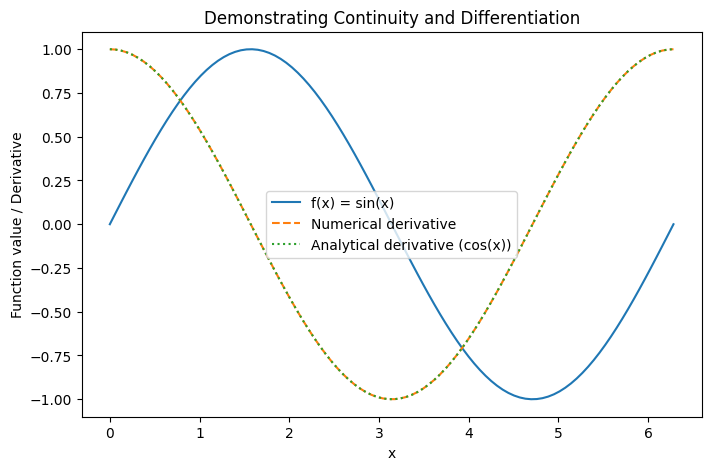

In [2]:
# Define the continuous function
def f(x):
    return np.sin(x)

# Compute the numerical derivative using a central difference method
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Generate values for x
x_vals = np.linspace(0, 2 * np.pi, 100)
f_vals = f(x_vals)
f_prime_numerical = numerical_derivative(f, x_vals)
f_prime_analytical = np.cos(x_vals)

# Plot the function and its derivatives
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label='f(x) = sin(x)')
plt.plot(x_vals, f_prime_numerical, '--', label='Numerical derivative')
plt.plot(x_vals, f_prime_analytical, ':', label='Analytical derivative (cos(x))')
plt.title('Demonstrating Continuity and Differentiation')
plt.xlabel('x')
plt.ylabel('Function value / Derivative')
plt.legend()
plt.show()


### **Example 1.2**

In this GPT inspired real-world example, we explore the idea that many cities experience a smooth (continuous) change in temperature over the course of a day. We model the temperature as a continuous function (using a shifted and scaled sine wave) and compute its derivative to determine the rate of change. The derivative reveals periods when the temperature is rising or falling most rapidly.  We demonstrate how a smooth function is defined and how to approximate its derivative numerically (representing the rate of change).

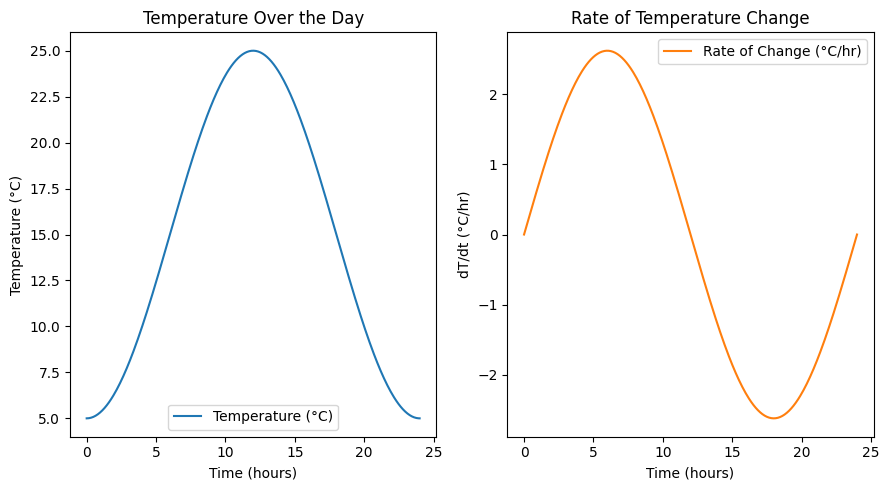

In [3]:
# Time in hours (0 to 24)
t = np.linspace(0, 24, 300)

# Simulated temperature function: model a typical day with a minimum in early morning and maximum in afternoon.
# For example: T(t) = 15 + 10*sin((pi/12)*(t-6)) produces a temperature curve with a low around 6 AM and high around 6 PM.
def temperature(t):
    return 15 + 10 * np.sin((np.pi/12)*(t - 6))

# Numerical derivative using central differences
def numerical_derivative(func, t, h=1e-3):
    return (func(t + h) - func(t - h)) / (2 * h)

temp_vals = temperature(t)
temp_rate = numerical_derivative(temperature, t)

# Plot temperature and its rate of change
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.plot(t, temp_vals, label='Temperature (°C)', color='tab:blue')
plt.title('Temperature Over the Day')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, temp_rate, label='Rate of Change (°C/hr)', color='tab:orange')
plt.title('Rate of Temperature Change')
plt.xlabel('Time (hours)')
plt.ylabel('dT/dt (°C/hr)')
plt.legend()

plt.tight_layout()
plt.show()


# **2: Taylor's Theorem**

The class text states that Taylor's theorem gives an approximation of a differentiable function around a given point by a polynomial.  The chapter shows that for functions that are sufficiently smooth, one can approximate them locally using a Taylor series with an error term.

### **Example 2.1**

This example demonstrates the second and third-order Taylor series approximations of the exponential function $exp(x)$ around $0$ and compares these approximations with the true function.

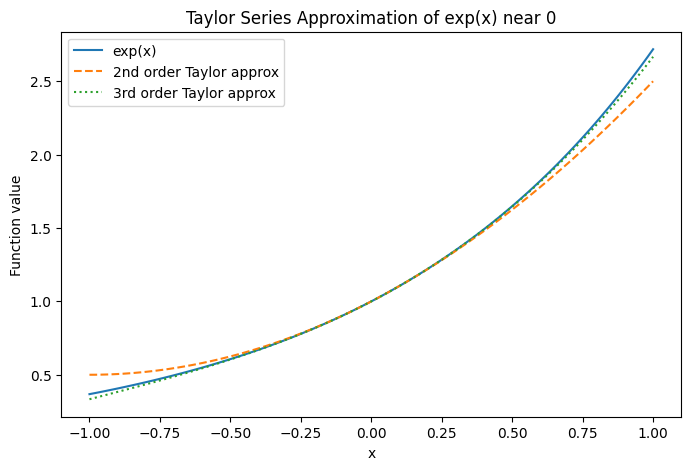

In [4]:
# Define the function to approximate
def f(x):
    return np.exp(x)

# Define Taylor series approximations of exp(x) about 0
def taylor_approx(x, order=2):
    if order == 2:
        return 1 + x + x**2 / 2
    elif order == 3:
        return 1 + x + x**2 / 2 + x**3 / 6
    # Additional orders can be added as needed

# Generate x values for plotting
x_vals = np.linspace(-1, 1, 100)
f_vals = f(x_vals)
taylor_vals_2 = taylor_approx(x_vals, order=2)
taylor_vals_3 = taylor_approx(x_vals, order=3)

# Plot the true function and its Taylor approximations
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label='exp(x)')
plt.plot(x_vals, taylor_vals_2, '--', label='2nd order Taylor approx')
plt.plot(x_vals, taylor_vals_3, ':', label='3rd order Taylor approx')
plt.title('Taylor Series Approximation of exp(x) near 0')
plt.xlabel('x')
plt.ylabel('Function value')
plt.legend()
plt.show()


### **Example 2.2**

In this GPT inspired real-world example, we simulate approximating the growth factor in continuously compounded interest.  In finance, an investment that grows continuously is modeled by the function $f(t) = e^{rt}$. For small values of $rt$ (e.g., short time intervals or low interest rates), Taylor's Theorem provides a polynomial approximation that is much easier to compute manually or understand intuitively.  Here we demonstrate how the Taylor series approximates the exponential function around $t=0$ and plot the comparison between the true growth factor and its polynomial approximations.

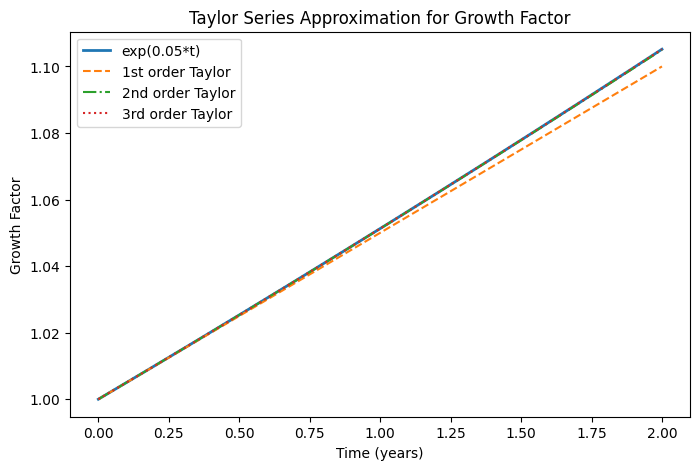

In [5]:
# Parameters for compound interest
r = 0.05  # interest rate (5%)
# The true function: growth factor over time
def growth_factor(t):
    return np.exp(r * t)

# Taylor approximations around t = 0
def taylor_approx(t, order=2):
    if order == 1:
        return 1 + r * t
    elif order == 2:
        return 1 + r * t + (r * t)**2 / 2
    elif order == 3:
        return 1 + r * t + (r * t)**2 / 2 + (r * t)**3 / 6
    else:
        raise ValueError("Order not supported.")

t_vals = np.linspace(0, 2, 200)
gf_true = growth_factor(t_vals)
gf_taylor1 = taylor_approx(t_vals, order=1)
gf_taylor2 = taylor_approx(t_vals, order=2)
gf_taylor3 = taylor_approx(t_vals, order=3)

# Plot the true function and its Taylor approximations
plt.figure(figsize=(8, 5))
plt.plot(t_vals, gf_true, label='exp(0.05*t)', linewidth=2)
plt.plot(t_vals, gf_taylor1, '--', label='1st order Taylor')
plt.plot(t_vals, gf_taylor2, '-.', label='2nd order Taylor')
plt.plot(t_vals, gf_taylor3, ':', label='3rd order Taylor')
plt.title('Taylor Series Approximation for Growth Factor')
plt.xlabel('Time (years)')
plt.ylabel('Growth Factor')
plt.legend()
plt.show()


# **Optimization with Gradient Descent**

The class text states that gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function. Once we know a function has a minimizer, we can apply a class of algorithms known as gradient descent method for solving optimization problems numerically.

### **Example 3.1**
The first example utilizes a single-variable quadratic function.  We minimize $f(x) = (x - 3)^2 + 2$, whose minimum is at $x = 3$. The code performs gradient descent starting from an initial guess, and the progression is plotted over the function graph.

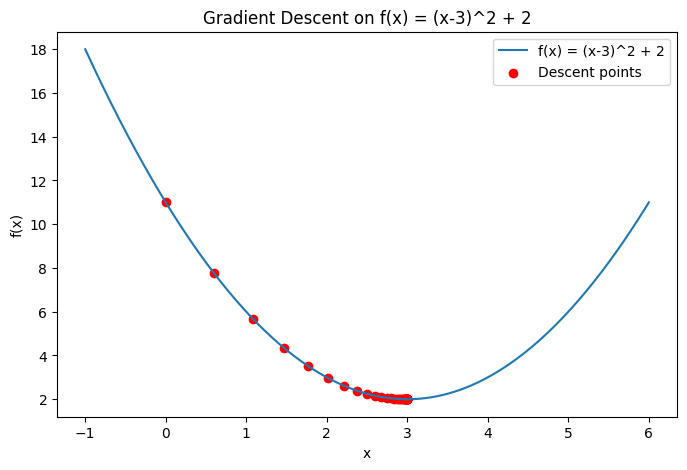

In [6]:
# Define the objective function and its derivative
def f(x):
    return (x - 3)**2 + 2

def grad_f(x):
    return 2 * (x - 3)

# Gradient descent parameters
x_current = 0.0  # initial guess
learning_rate = 0.1
num_iterations = 50
trajectory = [x_current]

# Perform gradient descent iterations
for _ in range(num_iterations):
    x_current = x_current - learning_rate * grad_f(x_current)
    trajectory.append(x_current)

# Plot the function and the descent trajectory
x_vals = np.linspace(-1, 6, 400)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f(x_vals), label='f(x) = (x-3)^2 + 2')
plt.scatter(trajectory, f(np.array(trajectory)), color='red', label='Descent points')
plt.title('Gradient Descent on f(x) = (x-3)^2 + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


### **Example 3.2**

The next example utilizes a simple two-dimensional quadratic function.  The algorithm updates the current point by moving opposite to the gradient.  We minimize the function $f(x, y) = (x - 1)^2 + (y + 2)^2$, which reaches its minimum at $(1, -2)$. The gradient descent path is visualized on a contour plot of the function.

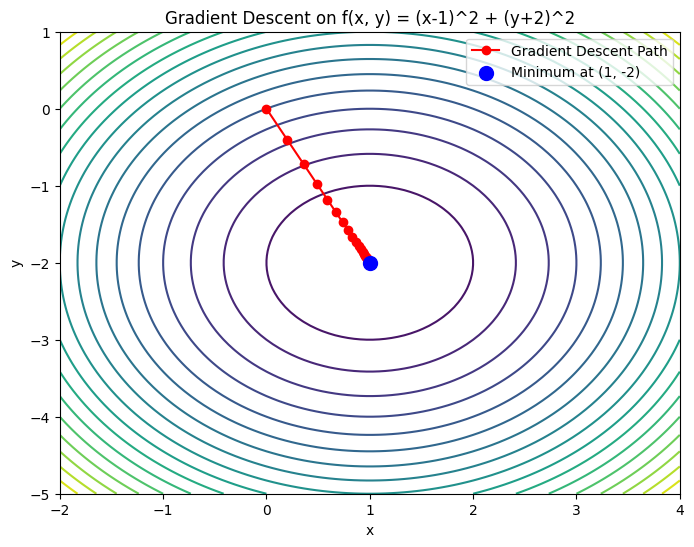

In [7]:
# Define the objective function and its gradient for (x, y)
def f(X):
    x, y = X
    return (x - 1)**2 + (y + 2)**2

def grad_f(X):
    x, y = X
    return np.array([2 * (x - 1), 2 * (y + 2)])

# Initialize gradient descent parameters
X_current = np.array([0.0, 0.0])  # initial guess
learning_rate = 0.1
num_iterations = 30
trajectory = [X_current.copy()]

# Perform gradient descent iterations
for _ in range(num_iterations):
    X_current = X_current - learning_rate * grad_f(X_current)
    trajectory.append(X_current.copy())

trajectory = np.array(trajectory)

# Create a contour plot of the function and plot the descent trajectory
x_vals = np.linspace(-2, 4, 100)
y_vals = np.linspace(-5, 1, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = (X_grid - 1)**2 + (Y_grid + 2)**2

plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z, levels=20, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Gradient Descent Path')
plt.scatter([1], [-2], color='blue', s=100, zorder=5, label='Minimum at (1, -2)')
plt.title('Gradient Descent on f(x, y) = (x-1)^2 + (y+2)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### **Example 3.3**

In this GPT inspired real-world example, we work to optimize product design parameters.  Consider a simplified product design scenario where a manufacturer wants to minimize the production cost by tuning two design parameters (for example, width and height). Suppose the ideal design parameters are $x=1$ and $y=-2$; deviations from these ideal values increase cost, modeled by a quadratic cost function $f(x,y) = (x-1)^2 + (y+2)^2$. Gradient descent is used to iteratively update the design parameters until the cost is minimized.  We demonstrate how a quadratic cost function can represent the deviation from an ideal design and implementat gradient descent to find the optimal parameters.

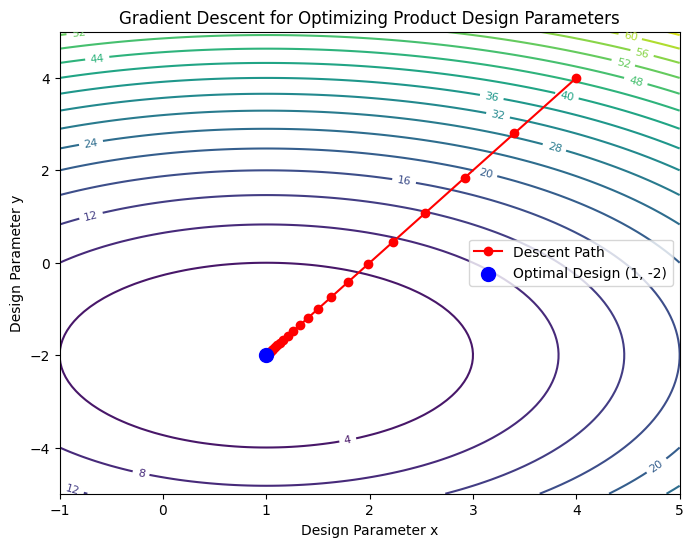

In [8]:
# Define the cost function representing design deviation
def cost_function(X):
    x, y = X
    return (x - 1)**2 + (y + 2)**2

# Gradient of the cost function
def grad_cost(X):
    x, y = X
    return np.array([2 * (x - 1), 2 * (y + 2)])

# Gradient descent parameters
X_current = np.array([4.0, 4.0])  # starting with an initial guess far from the ideal
learning_rate = 0.1
num_iterations = 30
trajectory = [X_current.copy()]

# Perform gradient descent iterations
for _ in range(num_iterations):
    X_current = X_current - learning_rate * grad_cost(X_current)
    trajectory.append(X_current.copy())

trajectory = np.array(trajectory)

# Create a contour plot of the cost function
x_vals = np.linspace(-1, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z = (X_grid - 1)**2 + (Y_grid + 2)**2

plt.figure(figsize=(8, 6))
contours = plt.contour(X_grid, Y_grid, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Descent Path')
plt.scatter([1], [-2], color='blue', s=100, zorder=5, label='Optimal Design (1, -2)')

plt.title('Gradient Descent for Optimizing Product Design Parameters')
plt.xlabel('Design Parameter x')
plt.ylabel('Design Parameter y')

plt.legend()
plt.show()
